# F1 Recall Accuracy Precision - electrocardiograms dataset

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

In [3]:
## YOUR CODE HERE
data = pd.read_csv('data/electrocardiograms.csv')
data.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187,target
0,0.000000,0.041199,0.112360,0.146067,0.202247,0.322097,0.363296,0.413858,0.426966,0.485019,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.000000,0.901786,0.760714,0.610714,0.466071,0.385714,0.364286,0.346429,0.314286,0.305357,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.994200,1.000000,0.951276,0.903712,0.917633,0.900232,0.803944,0.656613,0.421114,0.288863,...,0.294664,0.295824,0.301624,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.984472,0.962733,0.663043,0.211180,0.000000,0.032609,0.100932,0.177019,0.270186,0.313665,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.619217,0.489324,0.327402,0.110320,0.000000,0.060498,0.108541,0.108541,0.145907,0.192171,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1


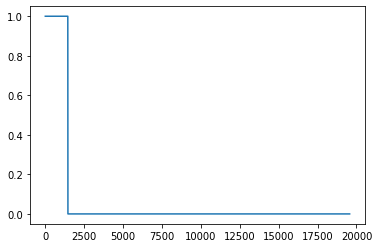

In [9]:
plt.plot(data['target'])

In [10]:
print(f"Risk: {data[data['target'] == 1].count()['target']}")
print(f"Healthy: {data[data['target'] == 0].count()['target']}")

Risk: 1448
Healthy: 18117


##  Logistic Regression in unbalanced dataset

In [11]:
X = data.drop(columns='target')
y = data['target']

In [13]:
model = LogisticRegression(max_iter=500)
cv_results = cross_validate(model, X, y, cv=5)
cv_results['test_score'].mean()

0.9391771019677997

### Model ratio for correct predict

In [15]:
model.fit(X, y)
prediction = model.predict(X)

In [19]:
accuracy_score(y, prediction)

0.9414771275236391

In [21]:
recall_score(y, prediction)

0.35151933701657456

In [24]:
precision_score(y, prediction)

0.7118881118881119

In [25]:
f1_score(y, prediction)

0.47064262598243173

### Confusion Matrix

/home/soutobias/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


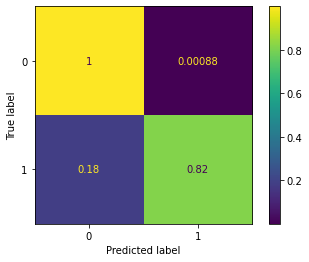

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test, normalize='true')  

The results are affected by the unbalanced dataset

## KNN Classifier in unbalanced dataset

In [29]:
# Instanciate model
model = KNeighborsClassifier()
cv_results = cross_validate(model, X, y, cv=5)
cv_results['test_score'].mean()

0.9854331714796831

In [30]:
model.fit(X, y)
prediction = model.predict(X)

/home/soutobias/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


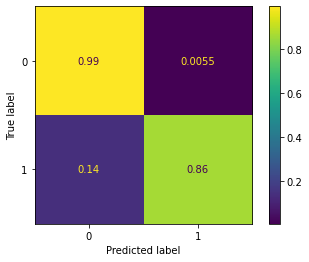

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test, normalize='true')  

### Classification Report for KNN - best model

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y, prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18117
           1       0.97      0.91      0.94      1448

    accuracy                           0.99     19565
   macro avg       0.98      0.95      0.97     19565
weighted avg       0.99      0.99      0.99     19565

